In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
import sklearn.preprocessing
import numpy as np

Similarité entre les personnages

In [86]:
f = open('./feature','r')
f_2 = open('./feature_chapiter','r')
X = []
X_2 = []
for line in f:
    temp = map(float, line.replace('[','').replace(']','').split(',')[:])
    X.append(temp)
for line in f_2:
    temp = map(float, line.replace('[','').replace(']','').split(',')[:])
    X_2.append(temp)

X = np.array(X)
X_2 = np.array(X_2)
    
nX = sklearn.preprocessing.normalize(X, norm='l2', axis=1, copy=True)
nX_2 = sklearn.preprocessing.normalize(X_2, norm='l2', axis=1, copy=True)

X = []
for i in range(len(nX)):
    X.append([])
    for t in nX[i]:
        X[i] = np.append(X[i], [t])
    for c in nX_2[i]:
        X[i] = np.append(X[i], [c])
X = np.array(X)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


<matplotlib.colorbar.Colorbar instance at 0x7f77a2724878>

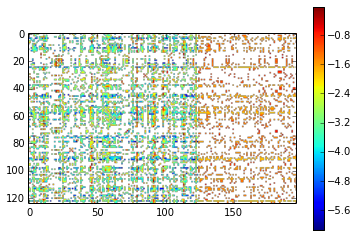

In [87]:
imshow(np.log(X))
colorbar()

In [88]:
X[13,:]

array([ 0.        ,  0.        ,  0.00967913,  0.01935826,  0.05807479,
        0.04839566,  0.01935826,  0.        ,  0.        ,  0.        ,
        0.        ,  0.03871653,  0.01935826, -0.00967913,  0.05807479,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00967913,
        0.        ,  0.        ,  0.        ,  0.00967913,  0.        ,
        0.05807479,  0.00967913,  0.        ,  0.        ,  0.00967913,
        0.        ,  0.        ,  0.        ,  0.00967913,  0.        ,
        0.        ,  0.        ,  0.        ,  0.10647045,  0.03871653,
        0.        ,  0.        ,  0.        ,  0.        ,  0.05807479,
        0.23229916,  0.08711219,  0.03871653,  0.        ,  0.        ,
        0.00967913,  0.        ,  0.        ,  0.        ,  0.07743305,
        0.0290374 ,  0.04839566,  0.05807479,  0.06775392,  0.09679132,
        0.        ,  0.01935826,  0.03871653,  0.09679132,  0.        ,
        0.01935826,  0.0290374 ,  0.00967913,  0.00967913,  0.  

In [89]:
X[14,:]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.06178021,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.06178021,  0.0308901 ,  0.18534062, -0.0308901 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15445052,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.0308901 ,  0.09267031,
        0.        ,  0.        ,  0.        ,  0.        ,  0.0308901 ,
        0.21623072,  0.0308901 ,  0.06178021,  0.        ,  0.        ,
        0.09267031,  0.06178021,  0.        ,  0.        ,  0.0308901 ,
        0.        ,  0.0308901 ,  0.0308901 ,  0.09267031,  0.12356041,
        0.        ,  0.0308901 ,  0.06178021,  0.0308901 ,  0.        ,
        0.0308901 ,  0.        ,  0.0308901 ,  0.        ,  0.  

In [90]:
np.dot(X[0,:],X[1,:])

1.5455886640635335

In [91]:
A = np.dot(X, X.T)

<matplotlib.colorbar.Colorbar instance at 0x7f77a25f1b00>

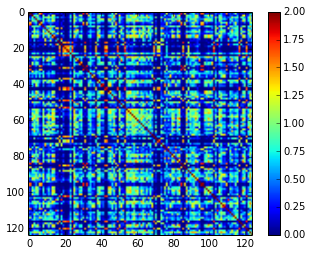

In [92]:
imshow(A); colorbar()

In [93]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(A)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print labels

Estimated number of clusters: 9
[0 0 3 4 5 7 0 0 7 1 2 7 1 7 7 1 1 8 1 8 8 8 8 7 8 7 2 2 3 3 0 8 0 5 6 6 6
 8 4 7 5 5 8 8 5 3 6 7 0 8 7 2 1 8 7 3 3 7 4 7 3 2 7 4 2 7 2 4 6 8 1 8 8 1
 1 5 0 5 6 7 7 5 7 7 0 8 0 7 8 3 6 6 7 7 2 0 0 3 3 7 3 3 8 2 1 7 4 6 6 0 1
 6 2 1 4 4 8 1 7 3 8 2 6 1]


In [94]:
name = open('./result','r')
ps = []
for line in name:
    person = line.split('      ')[0]
    ps.append(person)

In [95]:
res = []
for i in range(n_clusters_):
    res.append([])
for i in range(len(ps)):
    res[labels[i]].append(ps[i])

for obj in res:
    for name in obj:
        print name+'   '
    print '\n'

Aemon   
Alliser   
Benjen   
Bowen Marsh   
Grenn   
Halder   
Jon Snow   
Mormont   
Pyp   
Rast   
Sam   
Samwell Tarly   
Thorne   


Bronn   
Catelyn Stark   
Chella   
Chiggen   
Conn   
Kevan   
Marillion   
Moon   
Mord   
Shagga   
Timett   
Tyrion   
Vardis   
Yoren   


Brynden   
Edmure   
Greatjon   
Karstark   
Lord Hoster   
Lord Walder   
Lysa   
Roose Bolton   
Ser Rodrik   
Tully   
Walder Frey   


Alyn   
Gregor   
Gregor Clegane   
Joffrey   
King Robert   
Kingsguard   
Loras   
Rhaegar Targaryen   
Sandor Clegane   
Sansa   
Ser Boros   
Ser Gregor   
Vayon Poole   


Arryn   
Jaime   
Lannister   
Lord Tywin   
Lysa Arryn   
Starks   
Tyrion Lannister   
Tywin Lannister   


Arya   
Harwin   
Jeyne   
Jeyne Poole   
Joff   
Mordane   
Myrcella   
Nymeria   


Highgarden   
Hodor   
Hullen   
Jon   
Maester Luwin   
Nan   
Rickon   
Robb   
Theon   
Theon Greyjoy   
Tommen   
Winterfell   


Baelish   
Brandon   
Catelyn   
Cersei   
Cersei Lannister   
Dragonsto